<a href="https://colab.research.google.com/github/wilsonfmjr/PPGEEC2321---REDES-NEURAIS-E-DEEP-LEARNING/blob/main/Questao_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#Geração dos dados

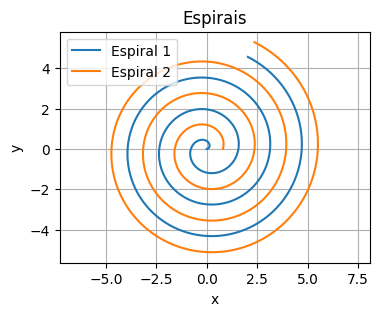

In [ ]:
N = 1000         # Define o tamanho do tensor

# Gera um vetor x [Nx1] de números aleatórios entre 0 e 20 radianos
theta = np.linspace(0, 20, N)

# Gera os dados da Espiral 1
x1 = (theta / 4) * np.cos(theta)
y1 = (theta / 4) * np.sin(theta)
spiral_1 = np.column_stack([x1, y1])

# Gera os dados da Espiral 2
x2 = (theta / 4 + 0.8) * np.cos(theta)
y2 = (theta / 4 + 0.8) * np.sin(theta)
spiral_2 = np.column_stack([x2, y2])

# Cria array de rótulos para as duas classes
label_1 = np.zeros(N)
label_2 = np.ones(N)

# Concatena os dados e os rótulos
X = np.concatenate([spiral_1, spiral_2])
y = np.concatenate([label_1, label_2])

# Plotando as duas funções
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label='Espiral 1')
plt.plot(x2, y2, label='Espiral 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espirais')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

[texto do link](https://)# Data Preparation

#Partição do banco de dados

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Cria a Rede Perceptron

In [ ]:
# Definir a Rede Perceptron de uma camada oculta
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

#Cria a Rede RBF

In [ ]:
## b) RBF (usando RBFSampler + Regressor)
rbf = make_pipeline(
    RBFSampler(gamma=1.0, n_components=100, random_state=1),
    LogisticRegression(max_iter=1000)
)

#Cria Máquina de Vetores de Suporte (SVM)

In [ ]:
# Modelo SVM com kernel RBF
svm = SVC(kernel='rbf', C = 100, gamma = 'auto')

#Treina modelos

In [ ]:
# Treinar o modelo MLP
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [ ]:
# Treinar o modelo RBF
rbf.fit(X_train, y_train)

Pipeline(steps=[('rbfsampler', RBFSampler(random_state=1)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Treinar o modelo SVM
svm.fit(X_train, y_train)

SVC(C=100, gamma='auto')

#Previsões dos modelos

In [ ]:
# Fazer previsões do MLP
y_pred_mlp = mlp.predict(X_test)

In [ ]:
# Fazer previsões do RBF
y_pred_rbf = rbf.predict(X_test)

In [ ]:
# Fazer previsões do SVM
y_pred_svm = svm.predict(X_test)

#Comitê de máquina

In [ ]:
# Combinar as previsões usando votação majoritária
# y_pred_combined = np.round((y_pred_mlp + y_pred_rbf + y_pred_svm) / 3).astype(int)

In [ ]:
#Comitê (votação majoritária)
votes = np.vstack([y_pred_mlp, y_pred_rbf, y_pred_svm])
y_pred_combined, _ = mode(votes, axis=0, keepdims=False)

#Acurácia

In [ ]:
# Calcular a acurácia
print("Acurácia MLP:", accuracy_score(y_test, y_pred_mlp))
print("Acurácia RBF:", accuracy_score(y_test, y_pred_rbf))
print("Acurácia SVM:", accuracy_score(y_test, y_pred_svm))
print("Acurácia Comitê (voto majoritário):", accuracy_score(y_test, y_pred_combined))

Acurácia MLP: 0.68
Acurácia RBF: 0.7025
Acurácia SVM: 1.0
Acurácia Comitê (voto majoritário): 0.885


#Matriz de Confusão

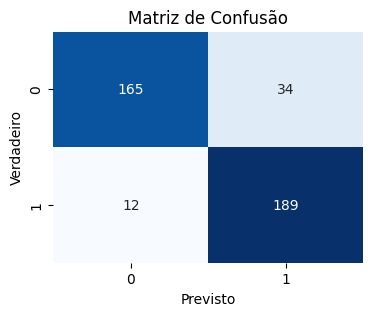

In [ ]:
# Gerar Matriz de Confusão
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_combined)
# print('Confusion Matrix:')
# print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

#Fronteira de decisão

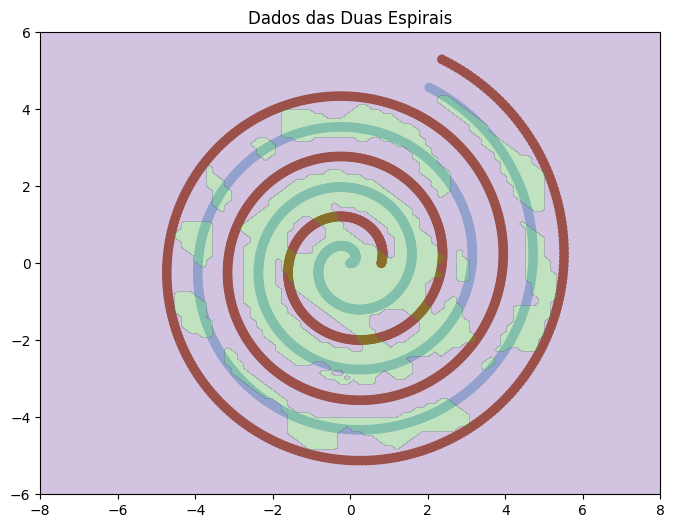

In [ ]:

#-------------------------------------------------------------------------------------------------

# Visualizar a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Dados das Duas Espirais')

# Visualizar a fronteira de decisão do comitê
xx, yy = np.meshgrid(np.linspace(-8, 8, 100), np.linspace(-6, 6, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_pred_grid = np.round((mlp.predict(X_grid) + rbf.predict(X_grid) + svm.predict(X_grid)) / 3).astype(int)
plt.contourf(xx, yy, y_pred_grid.reshape(xx.shape), alpha=0.3, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.Paired)
plt.show()

#-------------------------------------------------------------------------------------------------

# # Visualizar a fronteira de decisão
# plt.figure(figsize=(8, 6))
# # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rbf, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
# plt.plot(x1, y1, label='Spiral 1', color='b')
# plt.plot(x2, y2, label='Spiral 2', color='r')

# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# plt.title('SVM RBF')
# plt.xlabel('X')
# plt.ylabel('Y')

# # Criar grid para avaliar o modelo
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = y_pred_combined.decision_function(xy).reshape(XX.shape)

# # Plotar a fronteira de decisão
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plt.show()